In [1]:
from torchvision.datasets import MNIST
from torchvision import transforms
import torch

/home/brage/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
train_ds = MNIST("./", train=True, download=True, transform=transforms.ToTensor())
X, y = train_ds[0]

In [3]:
from model import Net

In [4]:
model = Net()
model.load_state_dict(torch.load("model.pkt"))
model.eval()

Net(
  (conv1): Conv2d(1, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=63, bias=True)
  (fc4): Linear(in_features=63, out_features=10, bias=True)
)

In [5]:
from fast_gradient import fast_gradient
import matplotlib.pyplot as plt

In [16]:
#torch.max(X[0])

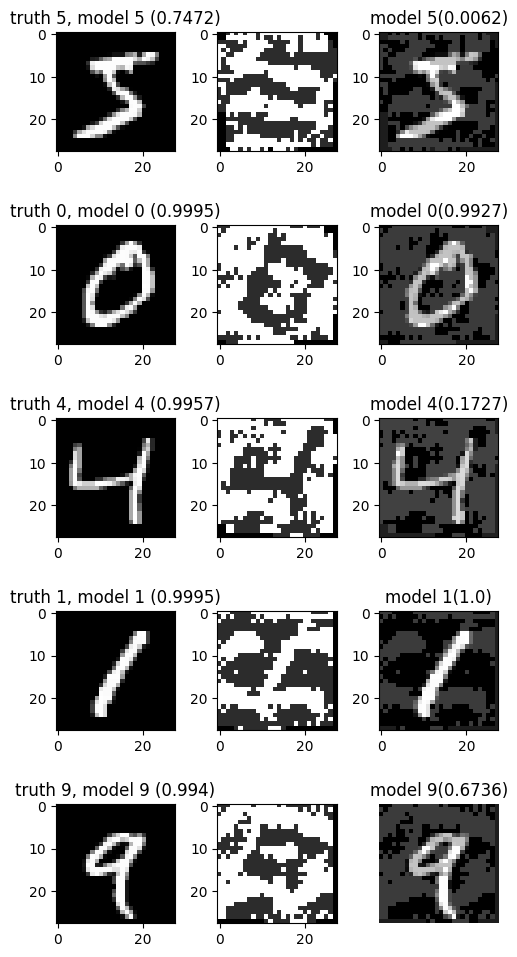

In [54]:
import torchvision.transforms.functional as TF

f, axarr = plt.subplots(5, 3, figsize=(5,10))

for i in range(5):
    X, y = train_ds[i]
    fast_X, fast_y = X, 1 #train_ds[100][1]
    mask_fast_gradient = fast_gradient(model, fast_X, fast_y, eps=0.15).float()
    

    y_pred_s = torch.nn.Softmax(dim=1)((model(X.reshape((1,) + X.shape))))
    y_pred = torch.argmax(y_pred_s, dim=1).item()
    confidence = round(y_pred_s[0][y_pred].item(), 4)

    combined = X.reshape((1,) + X.shape) - mask_fast_gradient.reshape((1,) + X.shape)
    combined_y_pred_s = torch.nn.Softmax(dim=1)((model(combined)))
    combined_y_pred = torch.argmax(y_pred_s, dim=1).item()
    mask_confidence = round(combined_y_pred_s[0][combined_y_pred].item(), 4)

    axarr[i][0].imshow(X[0], cmap='gray')
    axarr[i][0].set_title(f"truth {str(y)}, model {y_pred} ({confidence})")
    axarr[i][1].imshow(TF.to_pil_image(mask_fast_gradient[0]), cmap='gray')

    axarr[i][2].set_title(f"model {combined_y_pred}({mask_confidence})")
    axarr[i][2].imshow(combined[0][0], cmap='gray')

    plt.tight_layout()
    plt.axis('off')
